# Processing TESS data from TOI4504

In [5]:
%matplotlib inline
from process_TESS_data.process_flux_data import *
# import lightkurve as lk
# import pandas as pd
path = '../research/star_systems/TOI-4504/lightkurve/'


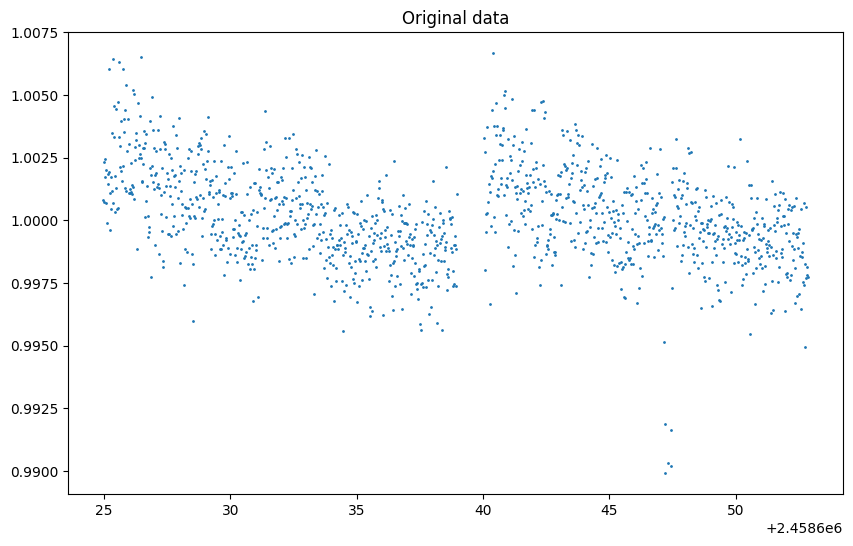

,time,flux,flux_err
0,2.458625e+06,1.000812,0.001442
1,2.458625e+06,1.000748,0.001442
2,2.458625e+06,1.002320,0.001442
3,2.458625e+06,1.002458,0.001442
4,2.458625e+06,1.001746,0.001442
...,...,...,...
1265,2.458653e+06,0.997716,0.001442
1266,2.458653e+06,1.000520,0.001442
1267,2.458653e+06,0.997824,0.001442
1268,2.458653e+06,0.998120,0.001442


In [6]:
full_path = path + "12/12_QLP_1800.csv"
df = csv2df(full_path)
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Original data")
df

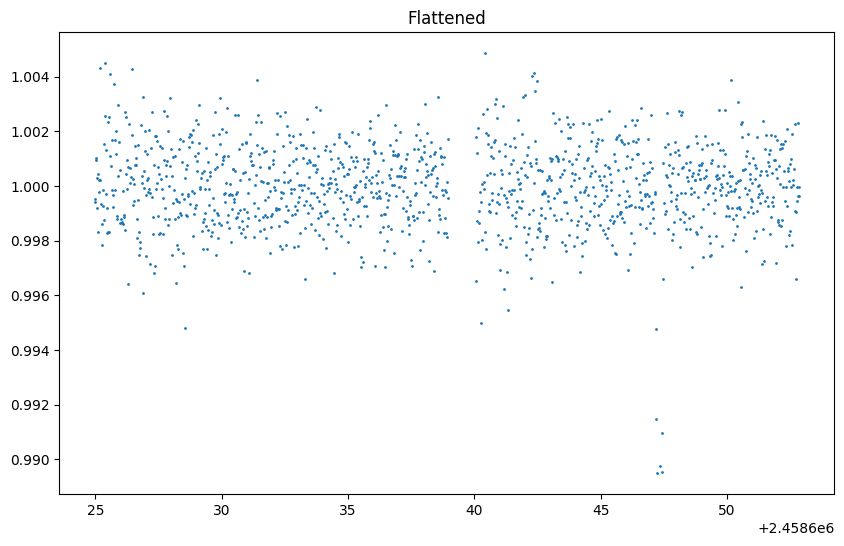

In [7]:
lc = df2lc(df)
lc = lc.flatten(
    window_length=101,  # Must be odd integer. Controls smoothness (longer → stronger smoothing).
    polyorder=2,        # Polynomial order (must be < window_length)
    break_tolerance=5,  # Split data at large time gaps.
    niters=3,           # Iterative sigma-clipping rounds. Remove outliers during flattening.
    sigma=3             # Outlier clipping threshold. Remove outliers during flattening.
)
# Use return_trend=True to retrieve the removed trend component.
df = lc2df(lc)
plot_this(df.time, [df.flux], ["flux"], title="Flattened")

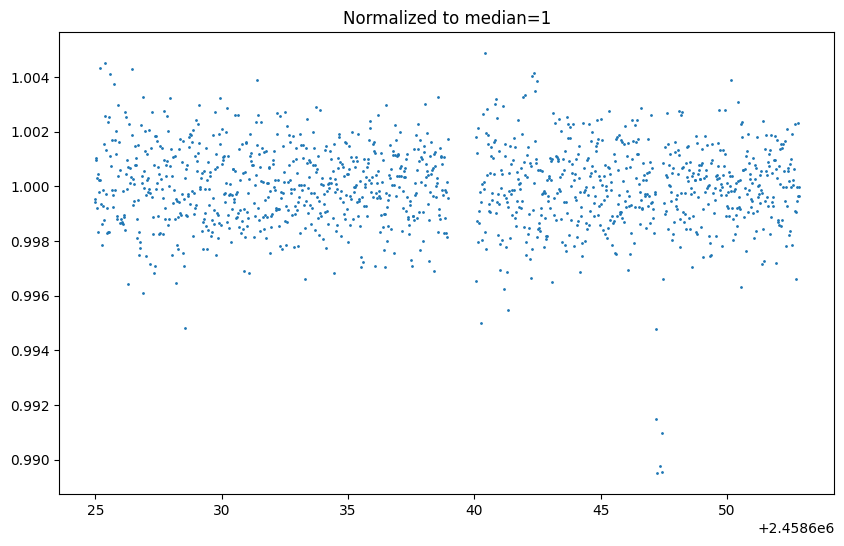

,time,flux,flux_err
0,2.458625e+06,0.999540,0.001440
1,2.458625e+06,0.999429,0.001440
2,2.458625e+06,1.000953,0.001440
3,2.458625e+06,1.001046,0.001440
4,2.458625e+06,1.000291,0.001440
...,...,...,...
1265,2.458653e+06,0.999466,0.001445
1266,2.458653e+06,1.002312,0.001445
1267,2.458653e+06,0.999648,0.001445
1268,2.458653e+06,0.999982,0.001445


In [8]:
median = median_flux(df)
df = scale_flux(df, 1/median)
plot_this(df.time, [df.flux], ["flux"], title="Normalized to median=1")
df

In [9]:
df2csv(df, full_path[:-4]+"_p.csv")